NameError: name 'np' is not defined

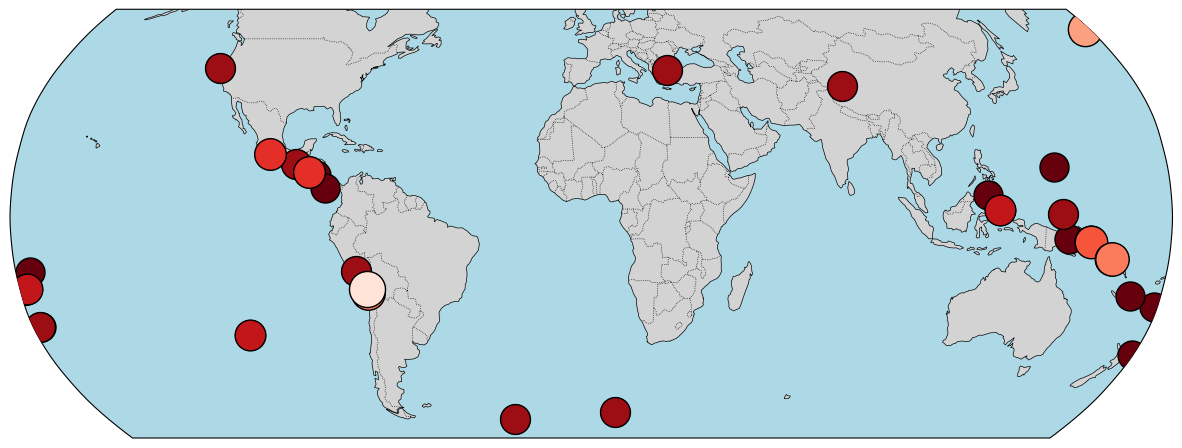

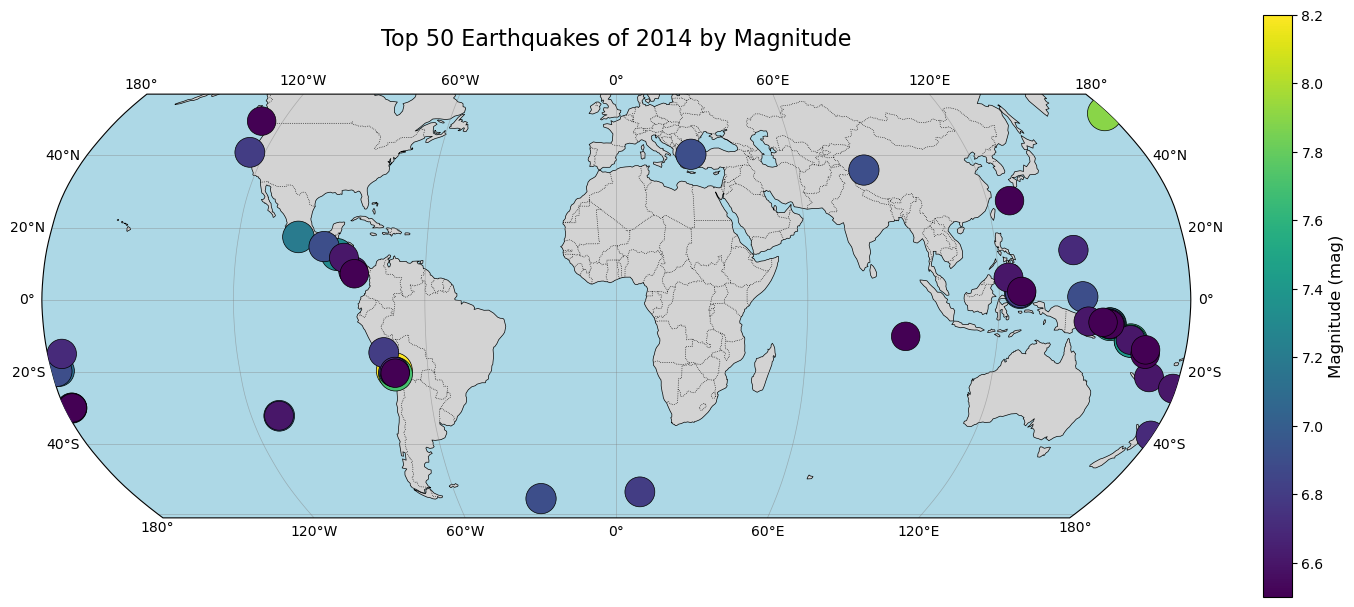

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. 读取数据
df = pd.read_csv('usgs_earthquakes.csv')

# 2. 按震级降序排序，取前50名
df_sorted = df.sort_values(by='mag', ascending=False)
df_top50 = df_sorted.head(50)

# 3. 创建地图
fig, ax = plt.subplots(figsize=(15, 10), 
                       subplot_kw={'projection': ccrs.Robinson()})

# 添加地图特征
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

# 4. 绘制地震点，按震级大小和颜色区分
scatter = ax.scatter(df_top50['longitude'], 
                     df_top50['latitude'], 
                     c=df_top50['mag'], 
                     cmap='viridis', 
                     s=df_top50['mag']**2 * 10,  # 大小与震级相关
                     transform=ccrs.PlateCarree(),
                     edgecolor='black', 
                     linewidth=0.5,
                     zorder=5)

# 5. 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05, shrink=0.6)
cbar.set_label('Magnitude (mag)', fontsize=12)

# 6. 设置标题
plt.title('Top 50 Earthquakes of 2014 by Magnitude', fontsize=16, pad=20)

# 7. 显示或保存图像
plt.tight_layout()
plt.savefig('global_earthquakes_top50.png', dpi=300, bbox_inches='tight')
plt.show()

=== 数据集信息 ===
<xarray.Dataset> Size: 6MB
Dimensions:                   (time: 1, nv: 2, lat: 224, lon: 464)
Coordinates:
  * lat                       (lat) float64 2kB 25.06 25.19 ... 52.81 52.94
  * lon                       (lon) float64 4kB -124.9 -124.8 ... -67.19 -67.06
  * time                      (time) datetime64[ns] 8B 1979-10-01
Dimensions without coordinates: nv
Data variables: (12/16)
    climatology_bounds        (time, nv) float64 16B ...
    Trend_Rainf_f             (time, lat, lon) float32 416kB ...
    Trend_Rainf_f_NoSigTest   (time, lat, lon) float32 416kB ...
    Trend_Max_5D_Rainf_f      (time, lat, lon) float32 416kB ...
    Trend_Heavy_Rainf_f       (time, lat, lon) float32 416kB ...
    Trend_Very_Heavy_Rainf_f  (time, lat, lon) float32 416kB ...
    ...                        ...
    Trend_Runoff              (time, lat, lon) float32 416kB ...
    Trend_Min_Runoff          (time, lat, lon) float32 416kB ...
    Trend_Max_Runoff          (time, lat, lon) floa

C:\Users\何遇到人生多少梦\AppData\Local\Temp\ipykernel_17468\244194962.py:196: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
E:\learning\gitk\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
E:\learning\gitk\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


全球地图已保存为 'global_trends_map.png'

=== 创建区域地图 ===
注意: 使用完整数据，但限制显示范围


E:\learning\gitk\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


区域地图已保存为 'regional_trends_Trend_Tair_f.png'


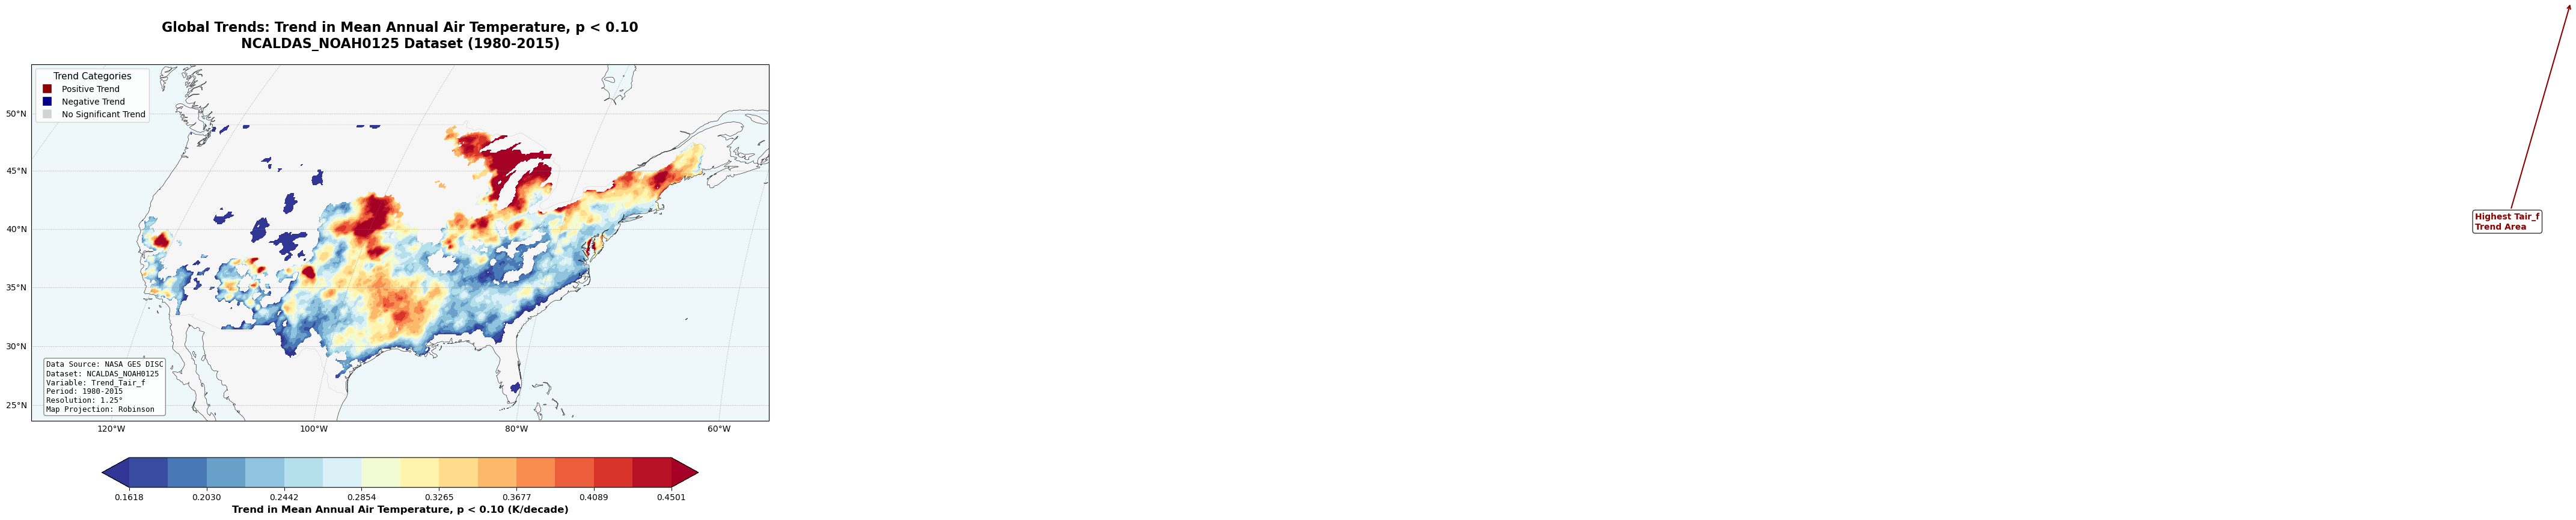

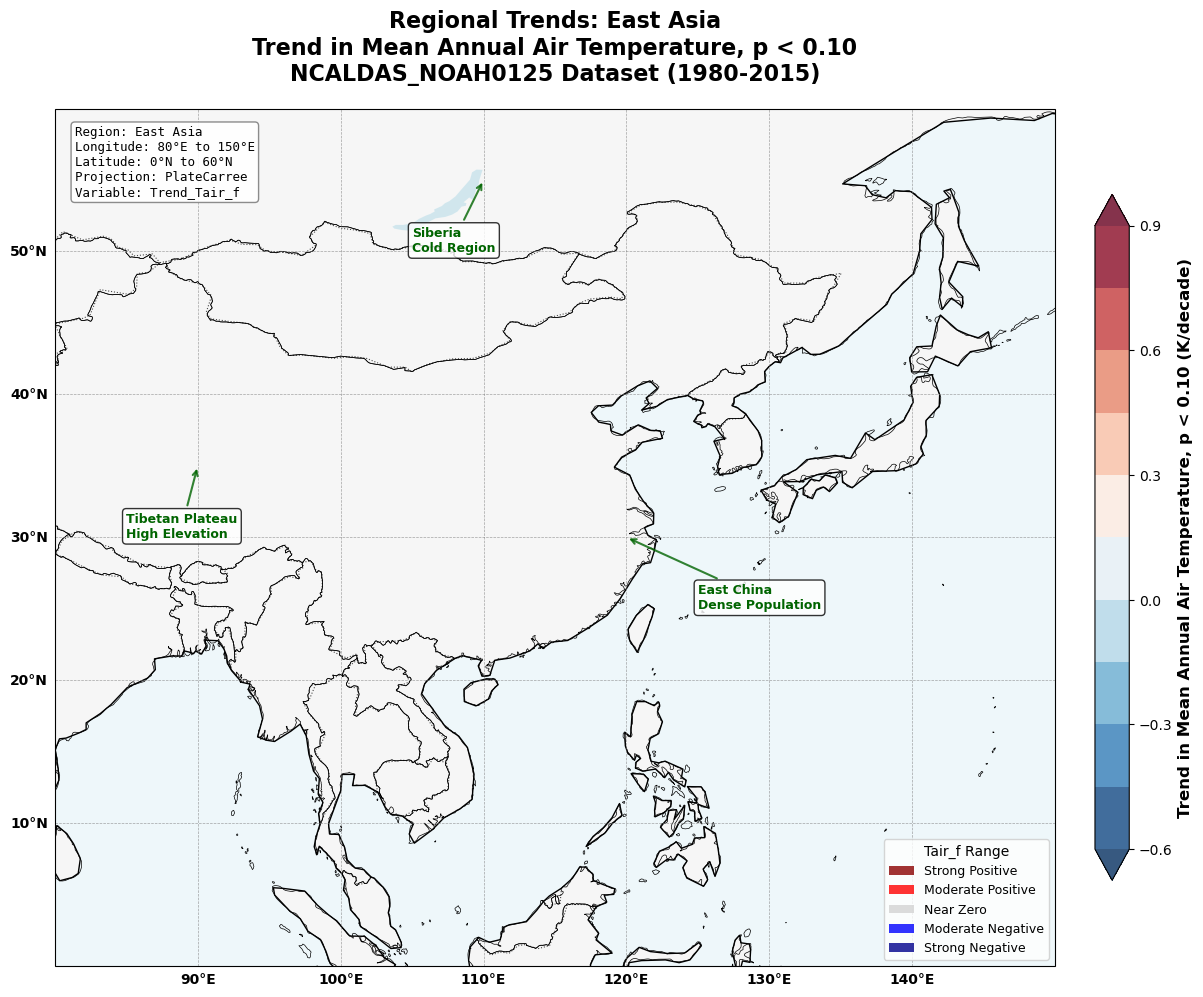


=== 任务完成 ===
1. 全球地图: global_trends_map.png
2. 区域地图: regional_trends_Trend_Tair_f.png

使用的变量: Trend_Tair_f
变量描述: Trend in Mean Annual Air Temperature, p < 0.10


In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches

# ==================== 1. 读取并查看数据 ====================
file_path = 'NCALDAS_NOAH0125_Trends.A198010_201509.002.nc'
ds = xr.open_dataset(file_path)

print("=== 数据集信息 ===")
print(ds)
print("\n=== 变量列表 ===")
for var in ds.variables:
    print(f"- {var}: {ds[var].attrs.get('long_name', '无描述')}")

print("\n=== 数据维度 ===")
print(f"维度: {ds.dims}")

# 查找温度相关的变量
temp_vars = []
for var in ds.variables:
    var_lower = var.lower()
    if any(keyword in var_lower for keyword in ['temp', 'tair', 't2m', 'temperature', 'air']):
        temp_vars.append(var)

if temp_vars:
    print(f"\n找到的温度相关变量: {temp_vars}")
    # 选择第一个温度相关变量
    variable_name = temp_vars[0]
else:
    # 如果没有找到温度变量，选择一个趋势变量
    trend_vars = [var for var in ds.variables if 'Trend' in var]
    if trend_vars:
        print(f"\n未找到温度变量，选择趋势变量: {trend_vars[0]}")
        variable_name = trend_vars[0]
    else:
        # 选择非坐标变量
        non_coord_vars = [var for var in ds.variables if var not in ['lat', 'lon', 'time', 'climatology_bounds']]
        if non_coord_vars:
            variable_name = non_coord_vars[0]
            print(f"\n选择变量: {variable_name}")

print(f"\n最终使用的变量: {variable_name}")

# ==================== 2. 提取数据 ====================
# 提取选定的变量
data_var = ds[variable_name]

# 获取变量描述
var_long_name = data_var.attrs.get('long_name', variable_name)
var_units = data_var.attrs.get('units', 'unknown')

print(f"变量描述: {var_long_name}")
print(f"单位: {var_units}")

# 检查数据维度
print(f"数据维度: {data_var.dims}")
print(f"数据形状: {data_var.shape}")

# 提取经纬度数据
if 'lon' in ds.variables:
    lon = ds['lon'].values
elif 'longitude' in ds.variables:
    lon = ds['longitude'].values
else:
    # 尝试从坐标中获取
    if 'lon' in data_var.coords:
        lon = data_var['lon'].values
    else:
        raise KeyError("无法找到经度数据")

if 'lat' in ds.variables:
    lat = ds['lat'].values
elif 'latitude' in ds.variables:
    lat = ds['latitude'].values
else:
    # 尝试从坐标中获取
    if 'lat' in data_var.coords:
        lat = data_var['lat'].values
    else:
        raise KeyError("无法找到纬度数据")

print(f"经度范围: {lon.min():.2f} 到 {lon.max():.2f}")
print(f"纬度范围: {lat.min():.2f} 到 {lat.max():.2f}")

# 处理数据：如果是3D数据（有时次维度），取第一个时次或平均值
if 'time' in data_var.dims:
    print(f"数据有时间维度，包含 {len(data_var['time'])} 个时间点")
    # 取第一个时间点的数据
    data_2d = data_var.isel(time=0)
    print(f"使用第一个时间点的数据")
else:
    data_2d = data_var

# 确保数据是2D的
if len(data_2d.shape) == 2:
    data_values = data_2d.values
elif len(data_2d.shape) == 1:
    # 如果是1D数据，需要网格化
    print("数据是1D的，尝试网格化...")
    data_values = data_2d.values.reshape(len(lat), len(lon))
else:
    print(f"数据形状: {data_2d.shape}")
    # 取第一个其他维度
    data_values = data_2d.isel({dim: 0 for dim in data_2d.dims if dim not in ['lat', 'lon']}).values

# 创建经纬度网格
lon_grid, lat_grid = np.meshgrid(lon, lat)

print(f"数据值范围: {np.nanmin(data_values):.4f} 到 {np.nanmax(data_values):.4f}")

# ==================== 3.1 全球地图 ====================
print("\n=== 创建全球地图 ===")
fig1 = plt.figure(figsize=(16, 10))

# 使用Robinson投影
proj_global = ccrs.Robinson(central_longitude=0)
ax1 = plt.subplot(111, projection=proj_global)

# 添加地理特征
ax1.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.2)
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.2)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5, alpha=0.8)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.3, alpha=0.5)

# 创建网格线
gl1 = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', 
                    alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.right_labels = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 10}
gl1.ylabel_style = {'size': 10}

# 绘制数据（使用contourf）
# 计算合适的等级数量
vmin, vmax = np.nanpercentile(data_values, [5, 95])
levels = np.linspace(vmin, vmax, 15)

cf1 = ax1.contourf(lon_grid, lat_grid, data_values, 
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlBu_r', levels=levels, extend='both')

# 添加色标
cbar1 = plt.colorbar(cf1, ax=ax1, orientation='horizontal', 
                     pad=0.08, shrink=0.8)
cbar1.set_label(f'{var_long_name} ({var_units})', fontsize=12, fontweight='bold')

# 添加标题
title1 = f'Global Trends: {var_long_name}\nNCALDAS_NOAH0125 Dataset (1980-2015)'
ax1.set_title(title1, fontsize=16, fontweight='bold', pad=20)

# 添加文本框
textbox_content = f"""Data Source: NASA GES DISC
Dataset: NCALDAS_NOAH0125
Variable: {variable_name}
Period: 1980-2015
Resolution: {ds.attrs.get('spatial_resolution', '1.25°')}
Map Projection: Robinson"""
ax1.text(0.02, 0.02, textbox_content, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='bottom', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

# 添加注释
if 'Trend' in variable_name:
    trend_type = variable_name.replace('Trend_', '')
    ax1.annotate(f'Highest {trend_type}\nTrend Area', 
                 xy=(150, 60), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax1),
                 xytext=(120, 40), textcoords=ccrs.PlateCarree()._as_mpl_transform(ax1),
                 arrowprops=dict(arrowstyle='->', color='darkred', lw=1.5),
                 fontsize=10, fontweight='bold', color='darkred',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 添加图例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Positive Trend',
           markerfacecolor='darkred', markersize=12),
    Line2D([0], [0], marker='s', color='w', label='Negative Trend',
           markerfacecolor='darkblue', markersize=12),
    Line2D([0], [0], marker='s', color='w', label='No Significant Trend',
           markerfacecolor='lightgray', markersize=12)
]

ax1.legend(handles=legend_elements, loc='upper left', fontsize=10, 
           title='Trend Categories', title_fontsize=11)

# 添加坐标轴标签
ax1.set_xlabel('Longitude', fontsize=12, labelpad=25)
ax1.set_ylabel('Latitude', fontsize=12, labelpad=25)

plt.tight_layout()
plt.savefig('global_trends_map.png', dpi=300, bbox_inches='tight')
print("全球地图已保存为 'global_trends_map.png'")

# ==================== 3.2 区域地图 ====================
print("\n=== 创建区域地图 ===")
fig2 = plt.figure(figsize=(14, 10))

# 使用PlateCarree投影并限制区域（以东亚为例）
proj_regional = ccrs.PlateCarree()
ax2 = plt.subplot(111, projection=proj_regional)

# 设置区域范围（东亚）
region_extent = [80, 150, 0, 60]  # [lon_min, lon_max, lat_min, lat_max]
ax2.set_extent(region_extent, crs=proj_regional)

# 添加地理特征
ax2.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.2)
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.2)
ax2.add_feature(cfeature.COASTLINE, linewidth=1.0)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8, alpha=0.7)
ax2.add_feature(cfeature.LAKES, facecolor='lightblue', alpha=0.5)

# 添加国家边界（如果需要）
try:
    ax2.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', 
                                                 '50m', edgecolor='black', 
                                                 facecolor='none', linewidth=0.5))
except:
    pass

# 创建网格线
gl2 = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', 
                    alpha=0.7, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 10, 'weight': 'bold'}
gl2.ylabel_style = {'size': 10, 'weight': 'bold'}

# 筛选区域数据
lon_mask = (lon >= region_extent[0]) & (lon <= region_extent[1])
lat_mask = (lat >= region_extent[2]) & (lat <= region_extent[3])

if np.any(lon_mask) and np.any(lat_mask):
    lon_regional = lon[lon_mask]
    lat_regional = lat[lat_mask]
    
    # 获取对应的数据切片
    lat_indices = np.where(lat_mask)[0]
    lon_indices = np.where(lon_mask)[0]
    data_regional = data_values[np.ix_(lat_indices, lon_indices)]
    
    # 创建区域网格
    lon_grid_regional, lat_grid_regional = np.meshgrid(lon_regional, lat_regional)
    
    # 绘制数据
    cf2 = ax2.contourf(lon_grid_regional, lat_grid_regional, data_regional,
                       transform=ccrs.PlateCarree(),
                       cmap='RdBu_r', levels=15, extend='both', alpha=0.8)
else:
    # 如果筛选失败，使用原始数据但限制显示范围
    print("注意: 使用完整数据，但限制显示范围")
    cf2 = ax2.contourf(lon_grid, lat_grid, data_values,
                       transform=ccrs.PlateCarree(),
                       cmap='RdBu_r', levels=15, extend='both', alpha=0.8)

# 添加色标
cbar2 = plt.colorbar(cf2, ax=ax2, orientation='vertical', 
                     pad=0.03, shrink=0.8)
cbar2.set_label(f'{var_long_name} ({var_units})', fontsize=12, fontweight='bold')

# 添加标题
title2 = f'Regional Trends: East Asia\n{var_long_name}\nNCALDAS_NOAH0125 Dataset (1980-2015)'
ax2.set_title(title2, fontsize=16, fontweight='bold', pad=20)

# 添加文本框
textbox_content_regional = f"""Region: East Asia
Longitude: {region_extent[0]}°E to {region_extent[1]}°E
Latitude: {region_extent[2]}°N to {region_extent[3]}°N
Projection: PlateCarree
Variable: {variable_name}"""
ax2.text(0.02, 0.98, textbox_content_regional, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

# 添加多个注释（针对东亚区域）
annotations = [
    ('Tibetan Plateau\nHigh Elevation', 90, 35, 85, 30),
    ('East China\nDense Population', 120, 30, 125, 25),
    ('Siberia\nCold Region', 110, 55, 105, 50)
]

for text, x, y, tx, ty in annotations:
    ax2.annotate(text, xy=(x, y), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax2),
                 xytext=(tx, ty), textcoords=ccrs.PlateCarree()._as_mpl_transform(ax2),
                 arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5, alpha=0.8),
                 fontsize=9, fontweight='bold', color='darkgreen',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# 添加图例
legend_elements_regional = [
    mpatches.Patch(facecolor='darkred', alpha=0.8, label='Strong Positive'),
    mpatches.Patch(facecolor='red', alpha=0.8, label='Moderate Positive'),
    mpatches.Patch(facecolor='lightgray', alpha=0.8, label='Near Zero'),
    mpatches.Patch(facecolor='blue', alpha=0.8, label='Moderate Negative'),
    mpatches.Patch(facecolor='darkblue', alpha=0.8, label='Strong Negative')
]

ax2.legend(handles=legend_elements_regional, loc='lower right', fontsize=9, 
           title=f'{trend_type if "Trend" in variable_name else "Value"} Range', 
           title_fontsize=10)

# 添加坐标轴标签
ax2.set_xlabel('Longitude (°E)', fontsize=12, labelpad=15, fontweight='bold')
ax2.set_ylabel('Latitude (°N)', fontsize=12, labelpad=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'regional_trends_{variable_name}.png', dpi=300, bbox_inches='tight')
print(f"区域地图已保存为 'regional_trends_{variable_name}.png'")

# ==================== 4. 显示所有图像 ====================
plt.show()

# 关闭数据集
ds.close()

print("\n=== 任务完成 ===")
print(f"1. 全球地图: global_trends_map.png")
print(f"2. 区域地图: regional_trends_{variable_name}.png")
print(f"\n使用的变量: {variable_name}")
print(f"变量描述: {var_long_name}")

IndexError: boolean index did not match indexed array along axis 0; size of axis is 1 but size of corresponding boolean axis is 224